In [1]:
#!/usr/bin/env python

In [2]:
import matplotlib as mpl
mpl.rcParams['savefig.directory'] = '/home/chieh/code/MachineLearningClasses/ML_2/3_Multivariate_sampling'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Parameters

In [4]:
α = 1.0    # Beta distribution parameter (heavily skewed toward 0)
β = 19.0    # Beta distribution parameter
n = 30000  # Number of samples

Step 1: Generate n samples from Beta(α, β) : p(i)

In [5]:
ĩ = np.random.beta(α, β, n)

Step 2: Sample t from Bernoulli(ĩ) for each ĩ

In [6]:
t = np.random.binomial(1, ĩ)

Step 3: Create a 2D histogram (heatmap)

In [7]:
heatmap, xedges, yedges = np.histogram2d(
    ĩ, t, 
    bins=[100, 2],  # 50 bins for p, 2 bins for t (0 and 1)
    range=[[0, 0.1], [-0.5, 1.5]]  # p: [0, 1], t: [-0.5, 1.5]
)

This matrix, each value is a single pixel

In [8]:
heatmap = heatmap.T  # Transpose and flip rows to align t=0 and t=1

Plot the heatmap

In [9]:
plt.figure(figsize=(10, 4))
plt.imshow(
    heatmap, 
    extent=[0, 1, -0.5, 1.5],  # Axis limits (x: p, y: t)
    aspect="auto", 
    cmap="viridis", 
    origin="lower"  # Ensure t=0 is at the bottom
)

Customize the plot

In [10]:
plt.colorbar(label="Frequency")
plt.xlabel("i (Beta distribution)")
plt.ylabel("t (Bernoulli samples)")
plt.yticks([0, 1], ["0", "1"])  # Label y-axis with t=0 and t=1
plt.title("Heatmap of Ancestral Sampling (Beta(1,19) → Bernoulli)")

Text(0.5, 1.0, 'Heatmap of Ancestral Sampling (Beta(1,19) → Bernoulli)')

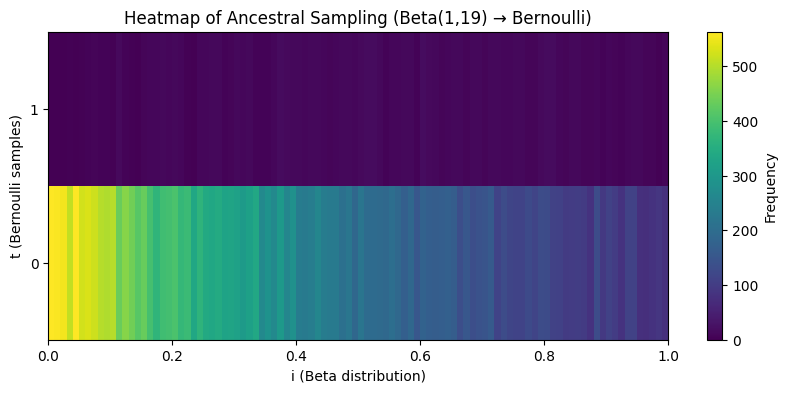

In [11]:
plt.show()